Student Performance Indicator

        Life cycle of Machine Learning Project

            -Understanding the problem statement
            -Data Collection
            -Data checks to perform
            -Data Pre-processing
            -Model Training
            -Choose best model



1) Problem Statement

        This project understands how the student's performance is affected by the other varibales such as Gender, Ethnicity, Parental level of Education, Lunch and preparation course.

2) Data Collection
        
        Data is collected from Kaggle and consists of 8 columns and 1000 rows.

2.1) Import Data and Required packages

        Import PANDAS,NUMPY,MATPLOTLIB,SEABORN AND WARNINGS LIBRARY.
        


In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import the CSV Data as Pandas DataFrame


In [185]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [214]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3
2,female,group B,master's degree,standard,none,90,95,93,278,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3
4,male,group C,some college,standard,none,76,78,75,229,76.3


In [186]:
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [187]:
df.shape

(1000, 8)

Dataset Information:

- Gender: Sex of students -- (Male/Female)
- Race/Ethnicity -- Group(A/B/C/D/E)
- Parental level of Education -- (Bachelor's Degree/Some College/Master's Degree/High School)
- Lunch -- (Standard/Free/Reduced)
- Test preparation course -- (Completed/Not completed)
- Maths score out of 100
- Reading score out of 100
- Writing score out of 100

Data Checks to perform:
- Check missing values
- Check duplicates
- Check data type
- Check the unique values in each column
- Check statitics of data
- Check various categories/values present in each column.

In [188]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [189]:
df.duplicated().sum()

0

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [191]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [192]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [193]:
print("categories in 'gender' variable:",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'Lunch' variable:",end=" ")
print(df["lunch"].unique())

print("Categories in 'Test preparation course' variable:",end=" ")
print(df["test preparation course"].unique())

categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable: ['standard' 'free/reduced']
Categories in 'Test preparation course' variable: ['none' 'completed']


In [194]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print("We have {} numerical features:{}".format(len(numeric_features),(numeric_features)))
print("We have {} categorical features:{}".format(len(categorical_features),(categorical_features)))

We have 3 numerical features:['math score', 'reading score', 'writing score']
We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [195]:
df["Total score"] = df['math score']+df['reading score']+df['writing score']
df['average'] = np.round(df['Total score']/3,1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3
2,female,group B,master's degree,standard,none,90,95,93,278,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3
4,male,group C,some college,standard,none,76,78,75,229,76.3


In [196]:
reading_full = df[df["reading score"] == 100]["gender"].count()
writing_full = df[df["writing score"] == 100]["gender"].count()
math_full = df[df["math score"] == 100]["gender"].count()

print("Number of students with full marks in reading:",reading_full)
print("Number of students with full marks in writing:",writing_full)
print("Number of students with full marks in maths:",math_full)

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in maths: 7


In [197]:
reading_poor = df[df["reading score"] <= 20]["gender"].count()
writing_poor = df[df["writing score"] <= 20]["gender"].count()
maths_poor = df[df["math score"] <= 20]["gender"].count()

print("Number of students with less marks in reading:",reading_poor)
print("Number of students with less marks in writing:",writing_poor)
print("Number of students with less marks in maths:",maths_poor)


Number of students with less marks in reading: 1
Number of students with less marks in writing: 3
Number of students with less marks in maths: 4


Most of the students are performed well in reading and Writing.

Most of the students are very poor in maths.

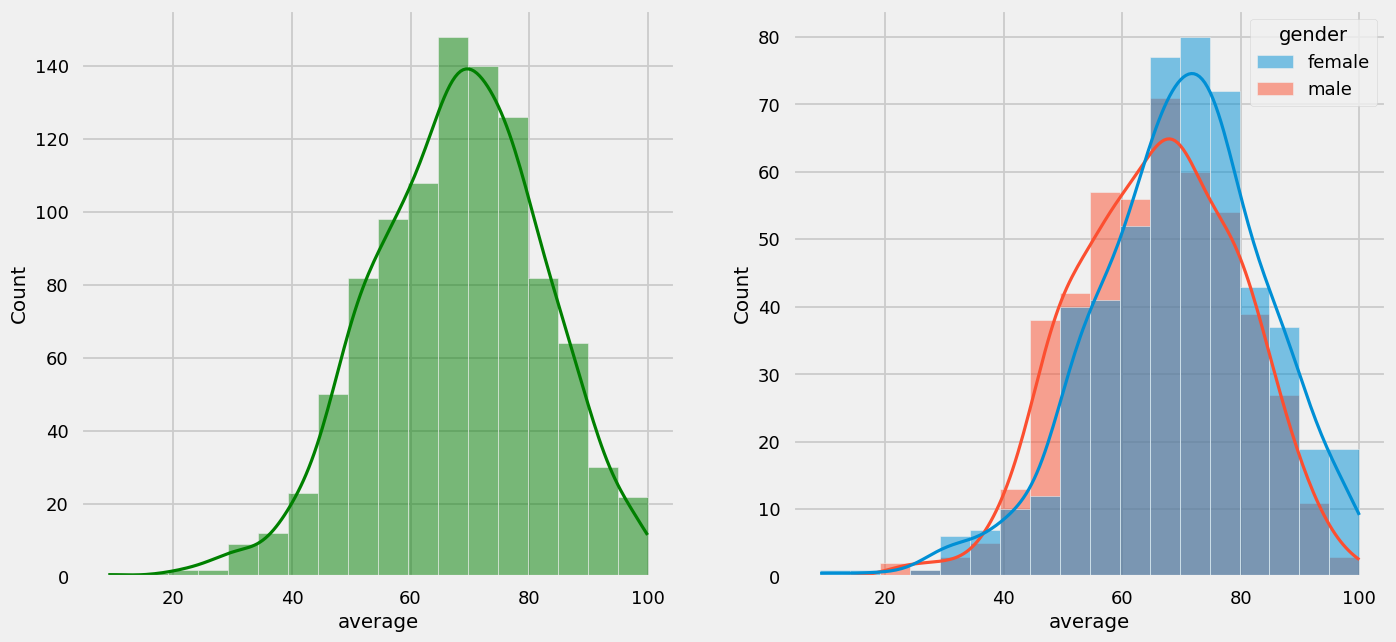

In [198]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = "average",binwidth=5,kde = True,color = "g")
plt.subplot(122)
sns.histplot(data = df,x = "average",binwidth = 5,kde = True,hue = "gender")
plt.show()

According to average score, female students are performed well.

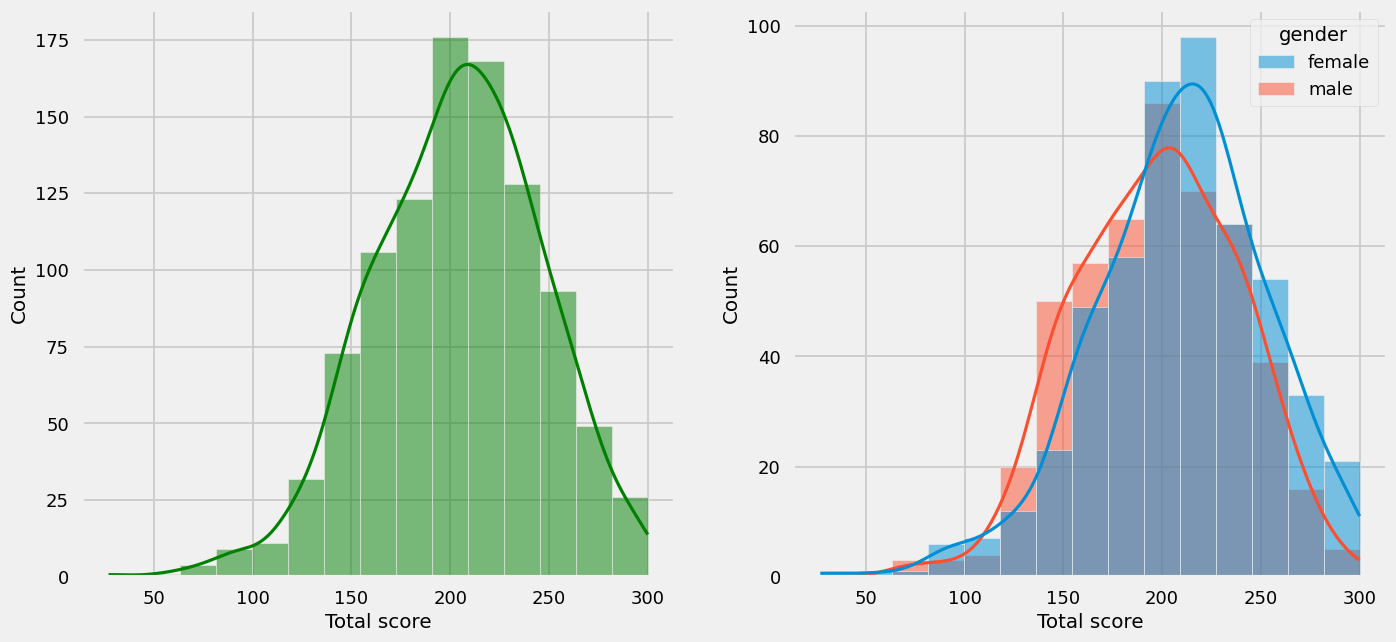

In [204]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = "Total score",bins=15,kde = True,color = "g")
plt.subplot(122)
sns.histplot(data = df,x = "Total score",bins = 15,kde = True,hue = "gender")
plt.show()

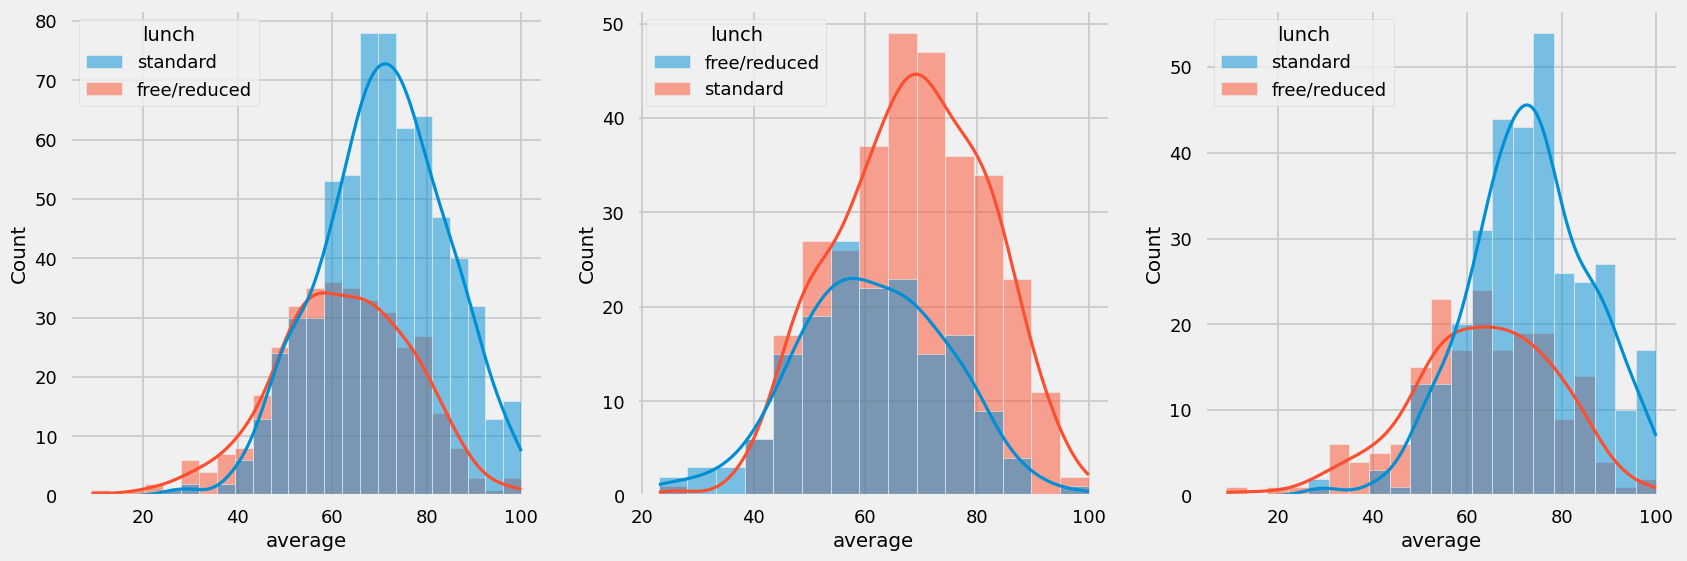

In [205]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = "average", kde = True, hue="lunch")
plt.subplot(142)
sns.histplot(data = df[df.gender=="male"], x = "average", kde = True, hue="lunch")
plt.subplot(143)
sns.histplot(data = df[df.gender=="female"], x = "average", kde = True, hue="lunch")
plt.show()

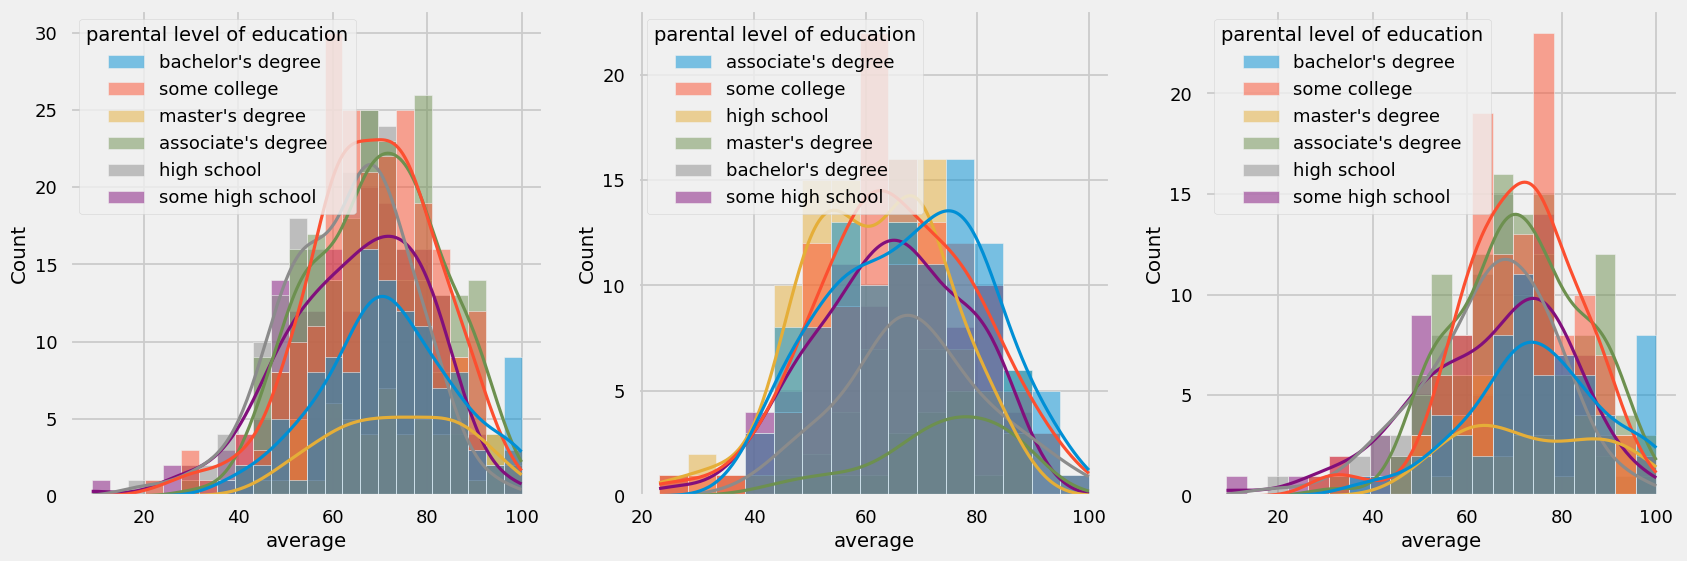

In [206]:
plt.subplots(1,3,figsize =(25,6))
plt.subplot(141)
sns.histplot(data = df, x = "average", kde = True, hue = "parental level of education")
plt.subplot(142)
sns.histplot(data = df[df.gender=="male"], x = "average", kde = True, hue="parental level of education")
plt.subplot(143)
sns.histplot(data = df[df.gender=="female"], x = "average", kde = True, hue="parental level of education")
plt.show()

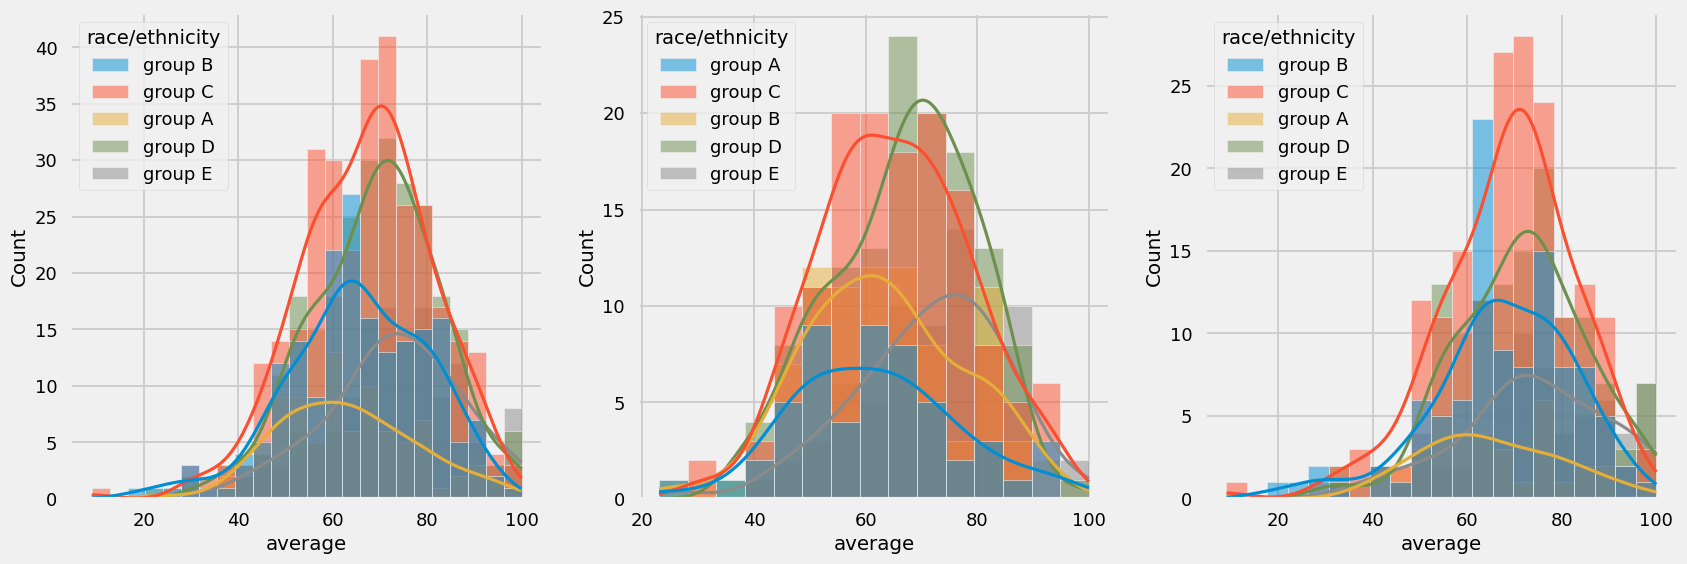

In [207]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = "average",kde = True, hue = "race/ethnicity")
plt.subplot(142)
sns.histplot(data = df[df.gender == "male"], x = "average",kde = True, hue = "race/ethnicity")
plt.subplot(143)
sns.histplot(data = df[df.gender == "female"], x = "average",kde = True, hue = "race/ethnicity")
plt.show()

- Male students & Female students of Group A race/ethnicity are performing poor in studies.
- Male students of Group D and Female students of Group C are performing good among the other students.

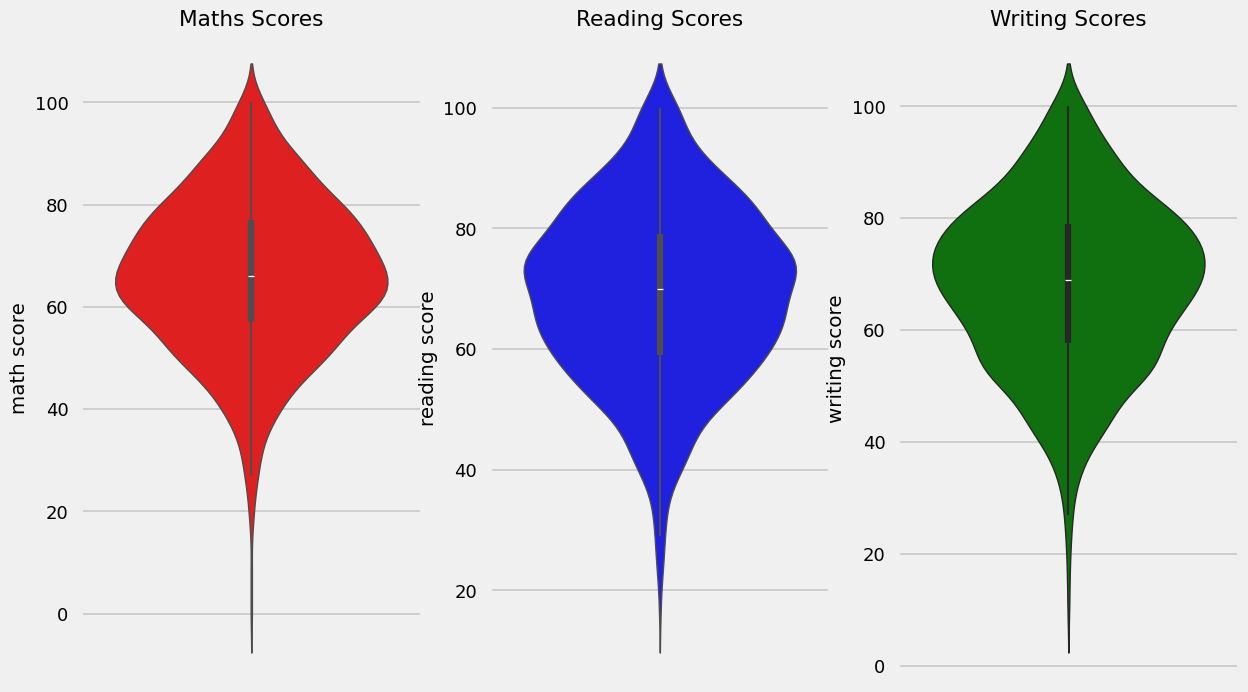

In [208]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Maths Scores")
sns.violinplot(y = "math score", data = df, color = "red", linewidth= 1)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(y = "reading score", data = df, color = "blue", linewidth= 1)
plt.subplot(1,4,3)
plt.title("Writing Scores")
sns.violinplot(y = "writing score", data = df, color = "green", linewidth= 1)
plt.show()

- Students scoring range in Maths is between 60-80.
- In writing and reading score, the range is from 50-80.

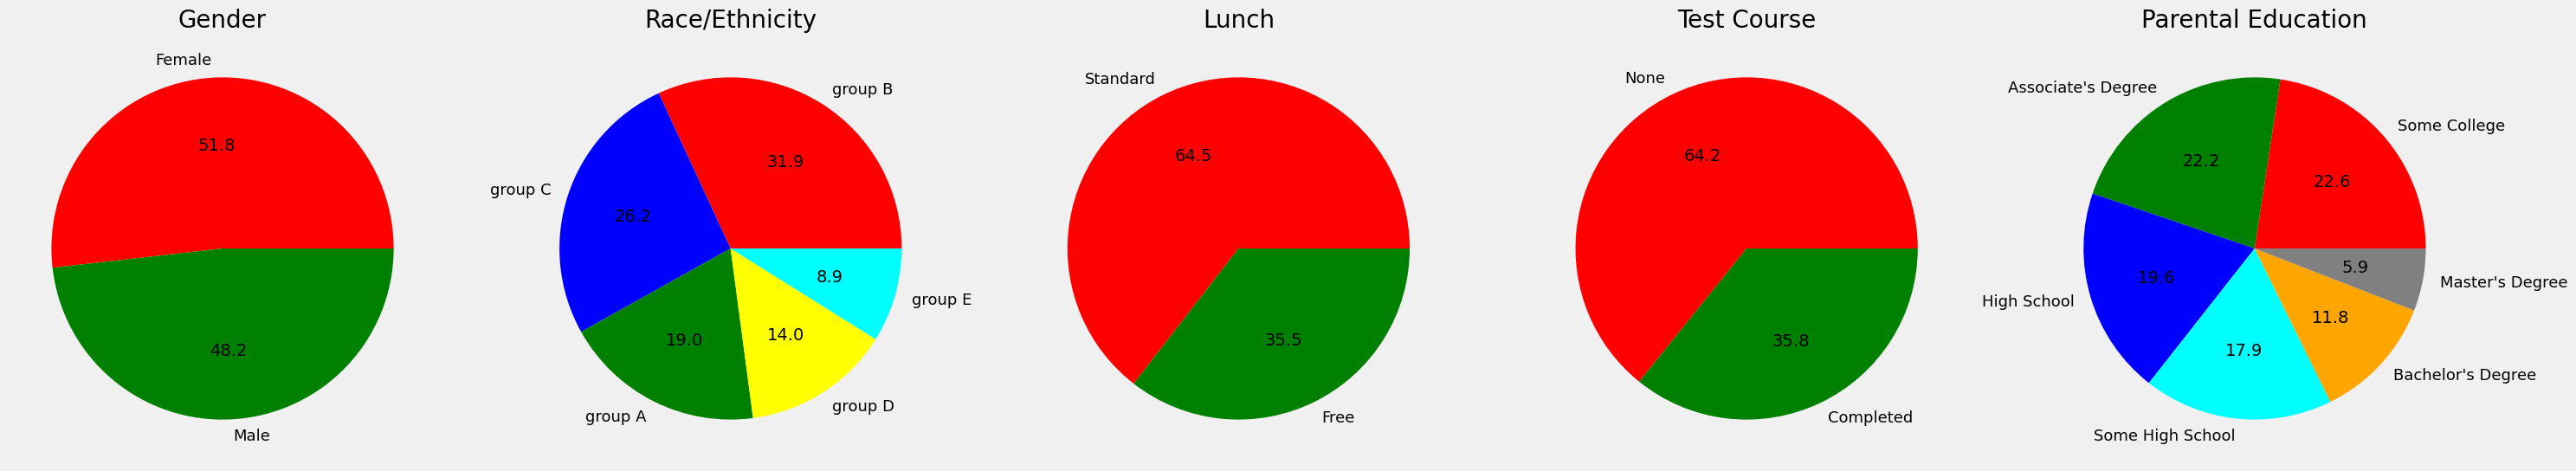

In [209]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = "Female","Male"
color = ['red',"green"]

plt.pie(size,colors = color,labels = labels, autopct = "%1.1f")
plt.title("Gender",fontsize = 20)
plt.axis("off")

plt.subplot(1,5,2)
size = df["race/ethnicity"].value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = ['red','blue','green','yellow','cyan']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

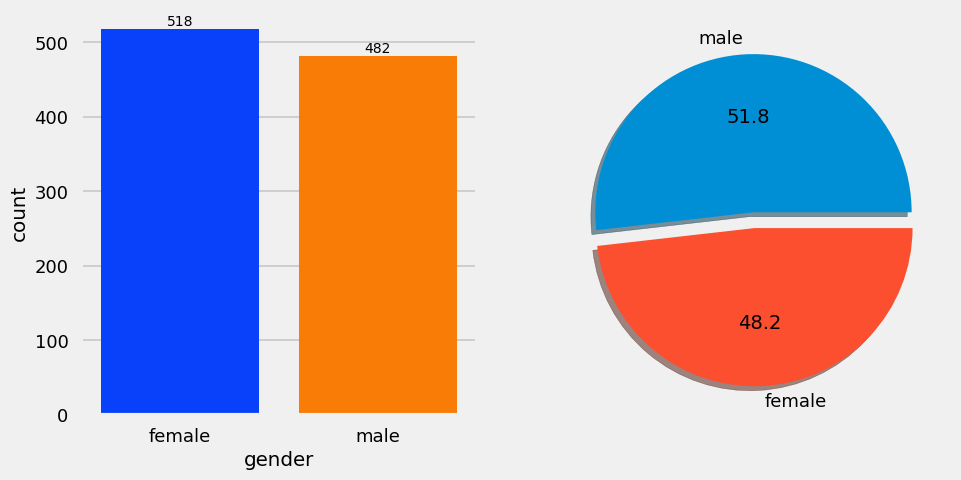

In [210]:
f,ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x = df['gender'],palette="bright",ax = ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color = "black",size = 10,)

plt.pie(x = df["gender"].value_counts(),labels = ["male","female"],explode = [0,0.1],autopct="%1.1f",shadow = True)
plt.show()

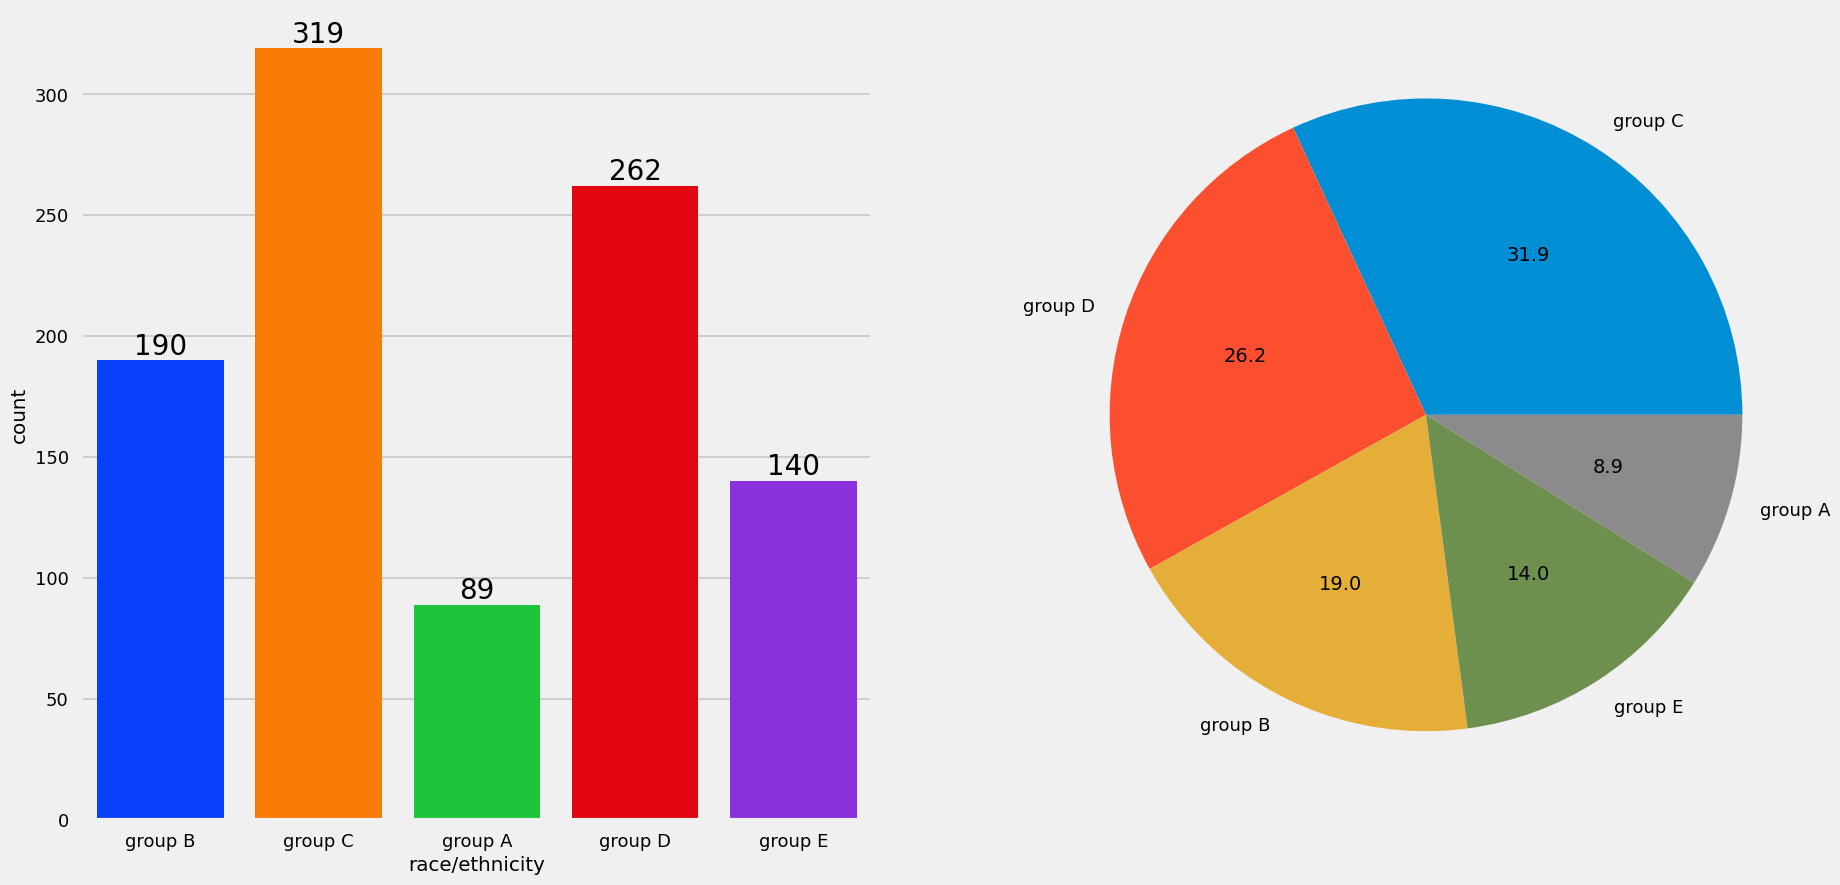

In [211]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x = df["race/ethnicity"],palette = "bright",ax = ax[0],saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color = "black",size = 20)

plt.pie(x = df["race/ethnicity"].value_counts(),labels = df["race/ethnicity"].value_counts().index,autopct = "%1.1f")

plt.show()

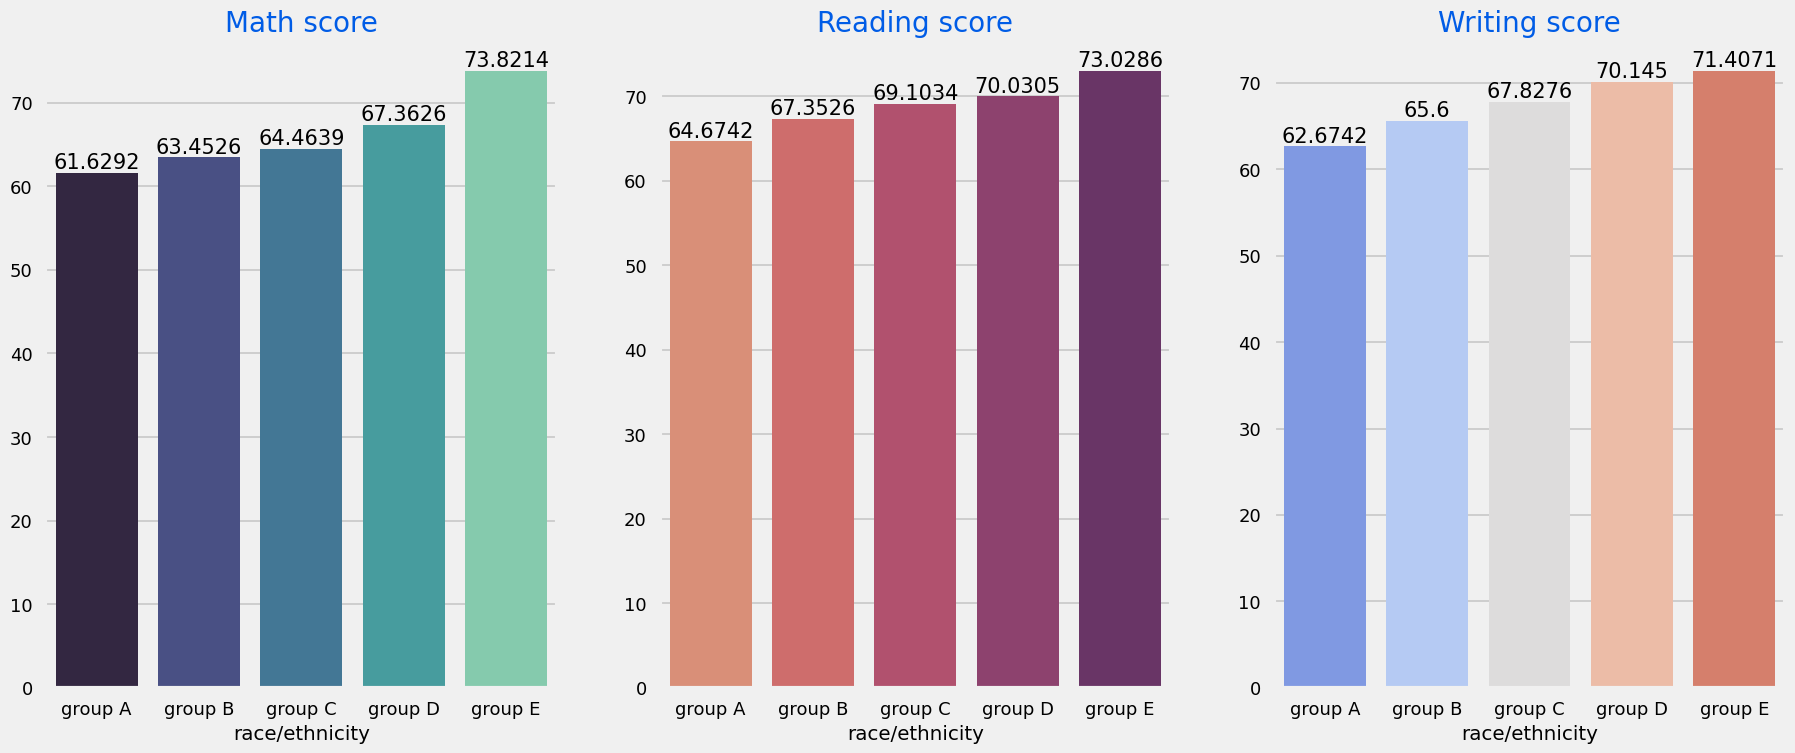

In [212]:

Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

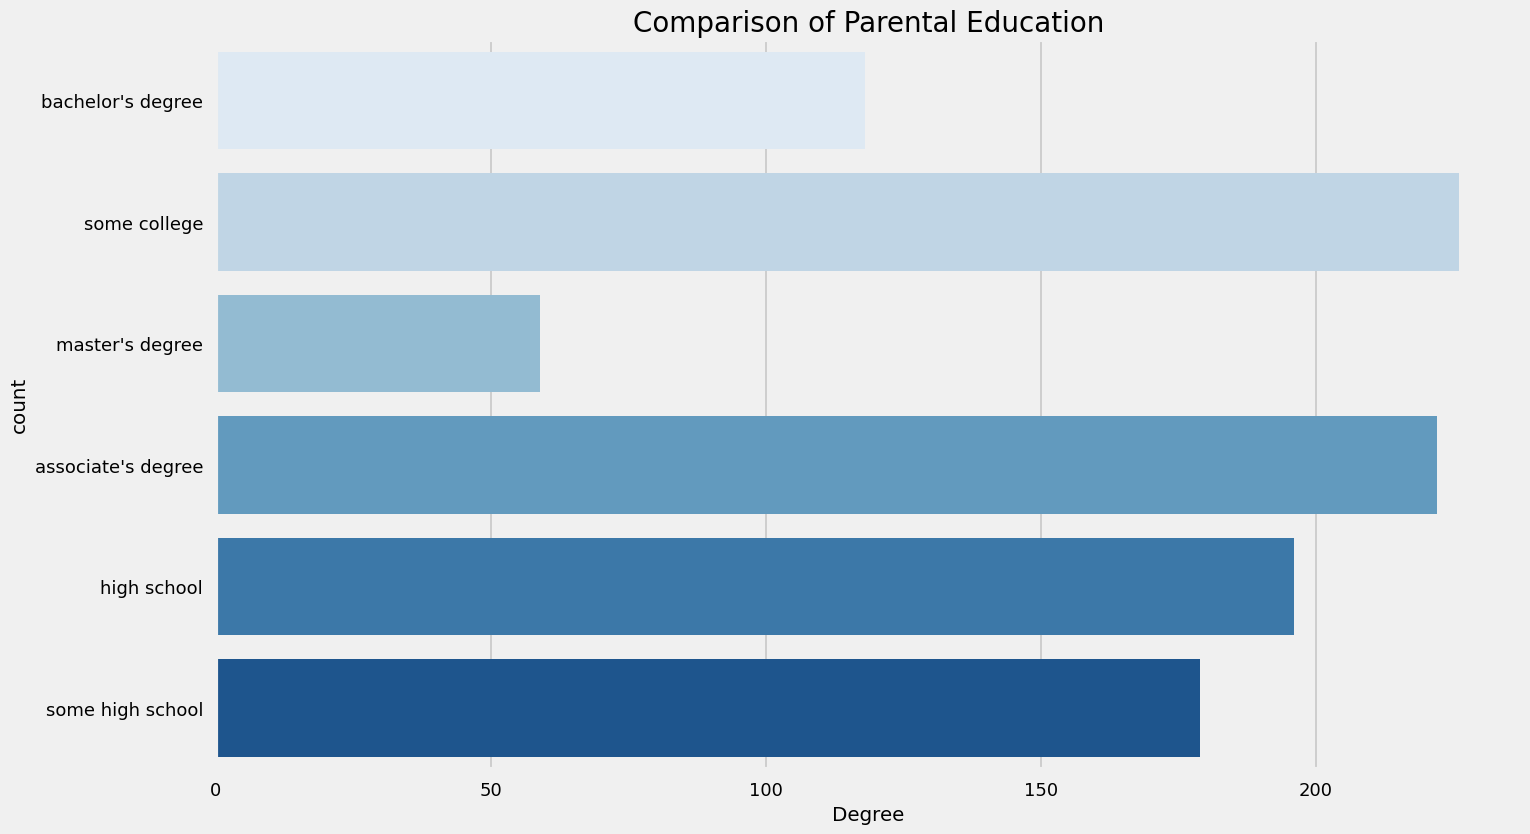

In [213]:

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

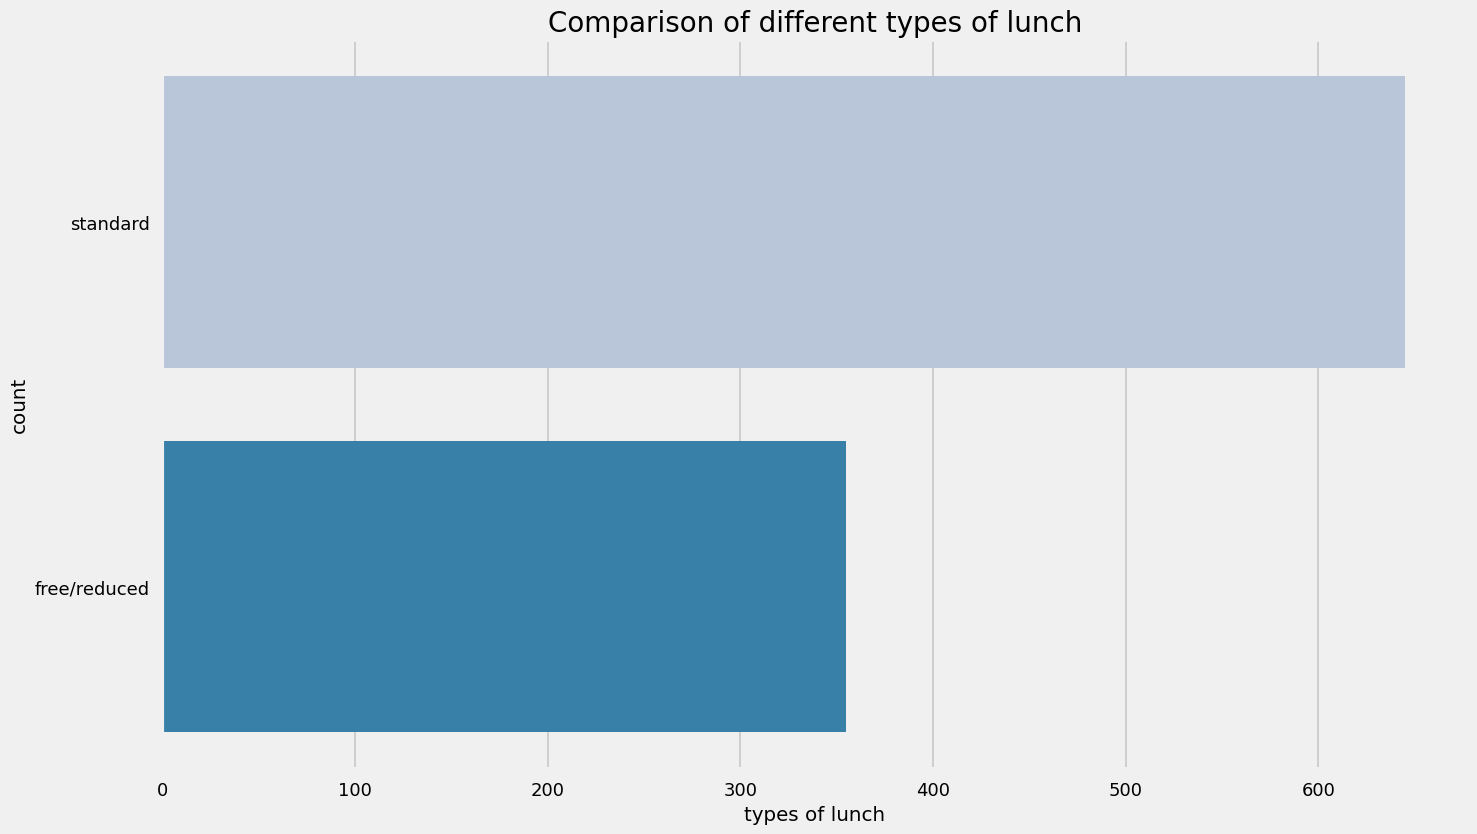

In [199]:

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

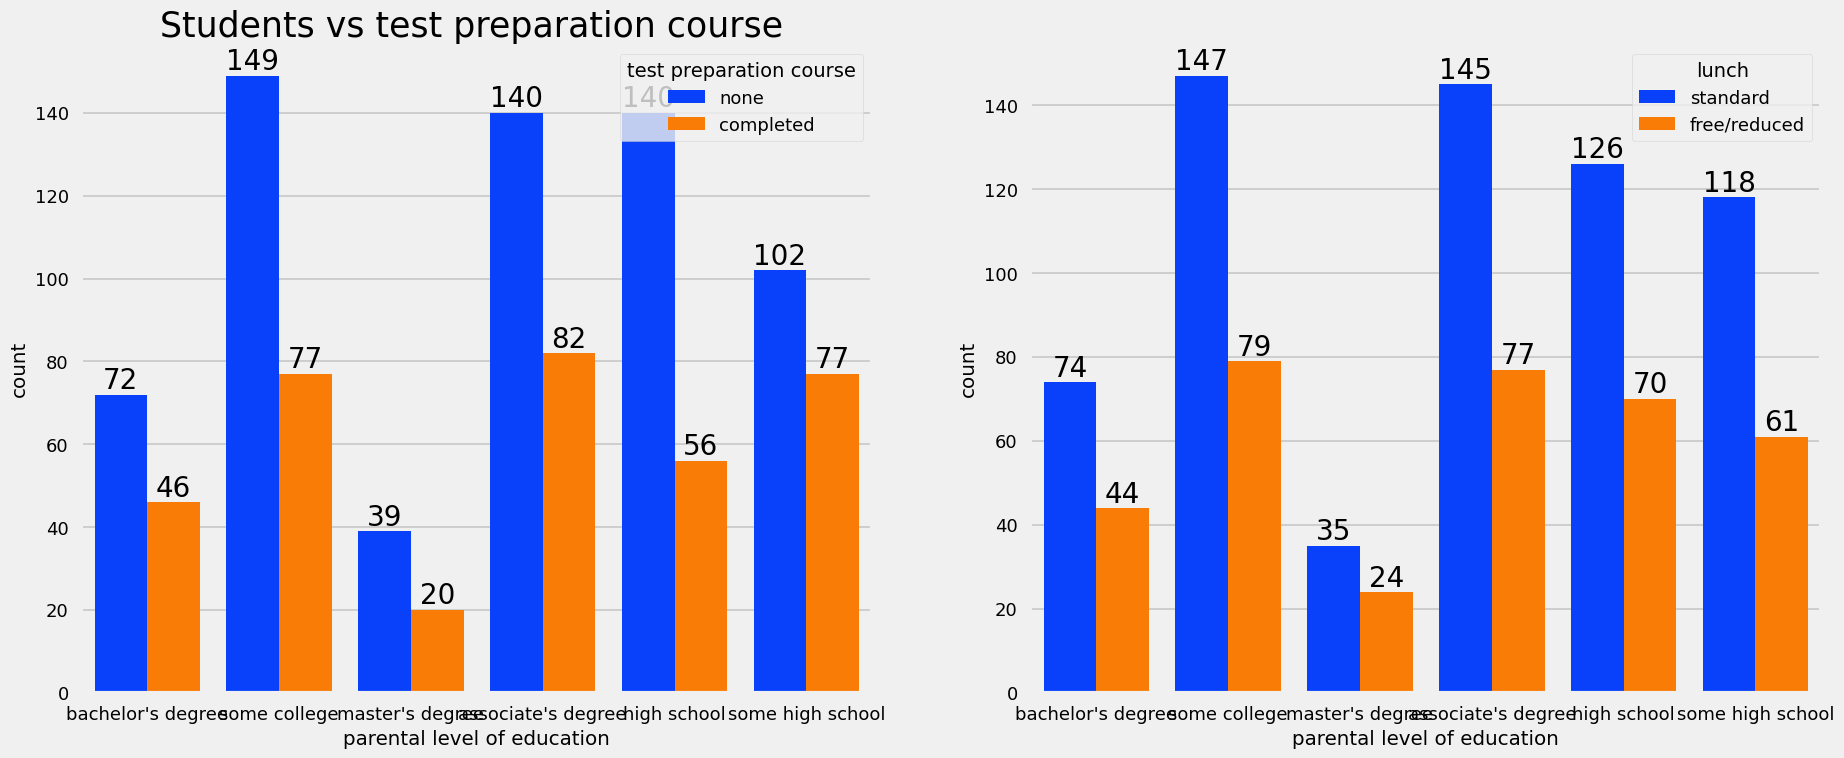

In [200]:

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

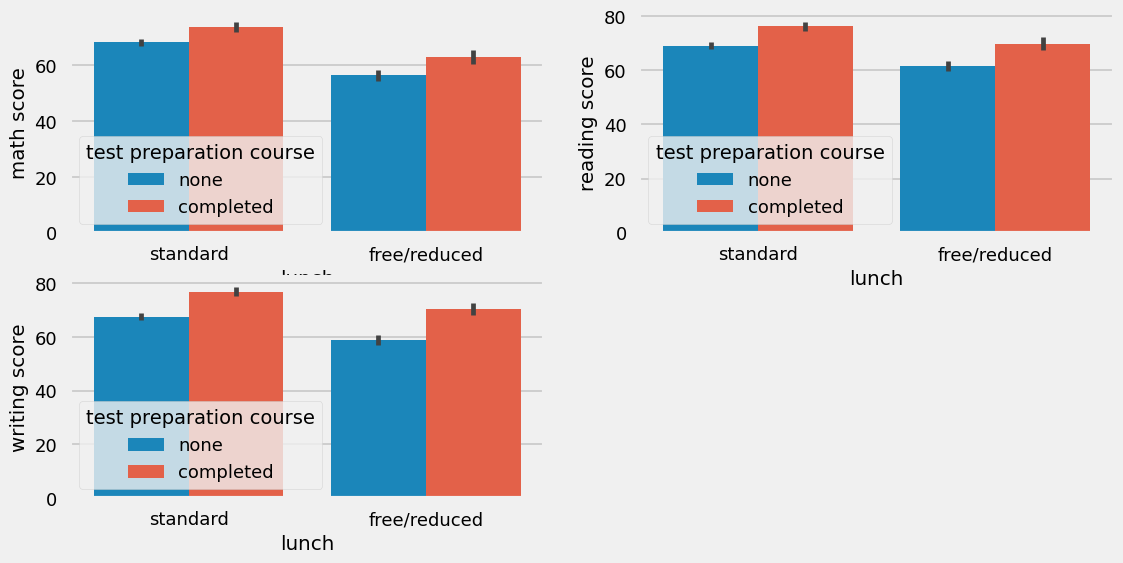

In [201]:

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

plt.show()

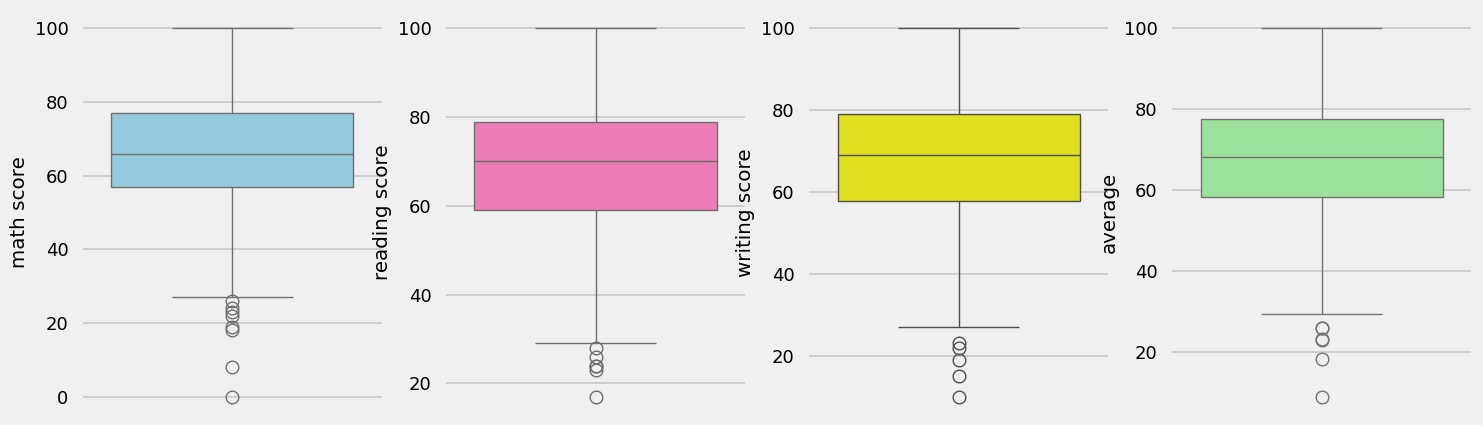

In [202]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

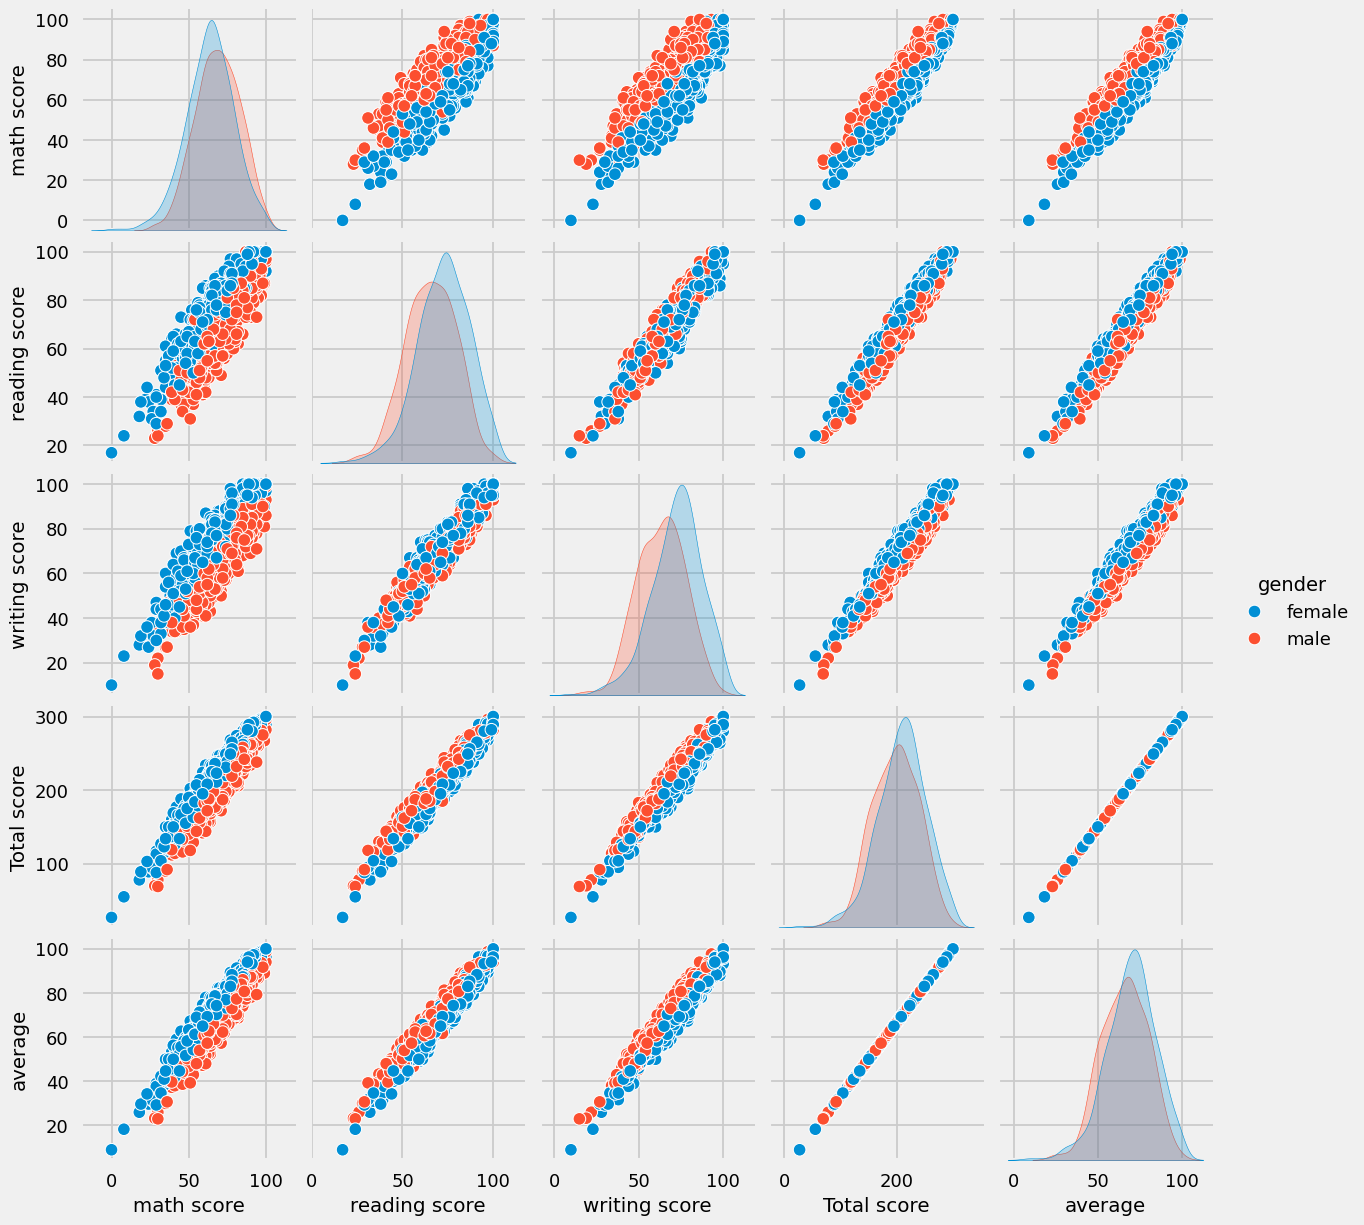

In [203]:

sns.pairplot(df,hue = 'gender')
plt.show()